In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
death_cases=pd.read_csv(r"C:\Users\prath\OneDrive\Desktop\myprojects\Untitled Folder\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv")
confirmed_cases=pd.read_csv(r"C:\Users\prath\OneDrive\Desktop\myprojects\Untitled Folder\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")
recovered_cases=pd.read_csv(r"C:\Users\prath\OneDrive\Desktop\myprojects\Untitled Folder\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_recovered_global.csv")

In [4]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [5]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80


In [6]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,821,825,825,828,839,839,839,839,839,855
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,476,503,506,520,544,564,567,569,575,577


In [7]:
latest_data=pd.read_csv(r"C:\Users\prath\OneDrive\Desktop\myprojects\Untitled Folder\COVID-19-master\csse_covid_19_data\csse_covid_19_daily_reports\08-10-2020.csv")

In [8]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-08-11 04:35:08,34.223334,-82.461707,335,9,0,326.0,"Abbeville, South Carolina, US",1365.841725,2.686567
1,22001.0,Acadia,Louisiana,US,2020-08-11 04:35:08,30.295065,-92.414197,2601,85,0,2516.0,"Acadia, Louisiana, US",4192.118624,3.267974
2,51001.0,Accomack,Virginia,US,2020-08-11 04:35:08,37.767072,-75.632346,1102,16,0,1086.0,"Accomack, Virginia, US",3410.075504,1.451906
3,16001.0,Ada,Idaho,US,2020-08-11 04:35:08,43.452658,-116.241552,9144,83,0,9061.0,"Ada, Idaho, US",1898.722349,0.907699
4,19001.0,Adair,Iowa,US,2020-08-11 04:35:08,41.330756,-94.471059,30,0,0,30.0,"Adair, Iowa, US",419.463087,0.000000


In [9]:
latest_data.isnull().sum()

FIPS                   696
Admin2                 691
Province_State         168
Country_Region           0
Last_Update              0
Lat                     78
Long_                   78
Confirmed                0
Deaths                   0
Recovered                0
Active                   3
Combined_Key             0
Incidence_Rate          78
Case-Fatality_Ratio     53
dtype: int64

In [10]:
cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/3/20', '8/4/20', '8/5/20', '8/6/20', '8/7/20', '8/8/20', '8/9/20',
       '8/10/20', '8/11/20', '8/12/20'],
      dtype='object', length=208)

In [11]:
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]
death=death_cases.loc[:,cols[4]:cols[-1]]
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [12]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
262,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,...,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841
264,0,0,0,0,0,0,0,0,0,0,...,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501


In [13]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
india_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
india_recoveries = []

In [14]:
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=death[i].sum()
    recovered_sum=recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(death_cases[death_cases['Country/Region']=='China'][i].sum())
    italy_deaths.append(death_cases[death_cases['Country/Region']=='Italy'][i].sum()) 
    us_deaths.append(death_cases[death_cases['Country/Region']=='US'][i].sum())
    spain_deaths.append(death_cases[death_cases['Country/Region']=='Spain'][i].sum())
    france_deaths.append(death_cases[death_cases['Country/Region']=='France'][i].sum())
    germany_deaths.append(death_cases[death_cases['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(death_cases[death_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(death_cases[death_cases['Country/Region']=='Russia'][i].sum())
    india_deaths.append(death_cases[death_cases['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [15]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82739,
 84116,
 86011,
 88395,
 90369,
 92947,
 95246,
 98037,
 101980,
 106018,
 109972,
 113872,
 118896,
 126559,
 132309,
 146716,
 157824,
 168973,
 183640,
 199487,
 219083,
 247002,
 276612,
 308921,
 342341,
 384508,
 425675,
 476494,
 539391,
 603791,
 671447,
 731024,
 795666,
 872076,
 948290,
 1029704,
 1112859,
 1193322,
 1265035,
 1337712,
 1414580,
 1498360,
 1585025,
 1672620,
 1749575,
 1846390,
 1916063,
 1985901,
 2066740,
 2163426,
 2251145,
 2325103,
 2405607,
 2478960,
 2554241,
 2631027,
 2720027,
 2806972,
 2891910,
 2964853,
 3033572,
 3108878,
 3185925,
 3269608,
 3356663,
 3438339,
 3515957,
 3592058,
 3672050,
 3762073,
 3851158,
 3942676,
 4028522,
 4104768,
 4181009,
 4264584,
 4349360

In [16]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4266,
 4611,
 4916,
 5413,
 5830,
 6471,
 7151,
 7956,
 8855,
 9962,
 11442,
 13149,
 14850,
 16772,
 19047,
 21828,
 24843,
 28370,
 32069,
 35549,
 39727,
 44602,
 50183,
 56515,
 62522,
 68406,
 73490,
 79393,
 87364,
 94166,
 101872,
 109196,
 115343,
 121153,
 126978,
 133930,
 142302,
 149645,
 158589,
 165120,
 169737,
 175216,
 182420,
 189220,
 196101,
 202812,
 208436,
 212356,
 217047,
 223533,
 230316,
 236306,
 241505,
 246966,
 250444,
 254592,
 260478,
 267052,
 272477,
 278066,
 282340,
 285921,
 289396,
 294953,
 300194,
 305471,
 310706,
 314870,
 318205,
 321502,
 326290,
 331186,
 335983,
 341271,
 345269,
 348415,
 349603,
 353816,
 359038,
 363749,
 368496,


In [17]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

In [18]:
confirmed_sum

20620847

In [19]:
death_sum

749358

In [20]:
recovered_sum

12826815

In [21]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 24,
 30,
 53,
 73,
 104,
 174,
 222,
 337,
 451,
 519,
 711,
 1109,
 1561,
 2157,
 2870,
 2968,
 4360,
 6141,
 8917,
 14157,
 19479,
 25825,
 33761,
 43850,
 54112,
 66055,
 84091,
 102276,
 122069,
 141205,
 162707,
 188724,
 214205,
 244610,
 276547,
 309699,
 337573,
 367215,
 397992,
 429686,
 464442,
 497943,
 527969,
 556522,
 581813,
 608878,
 637974,
 669272,
 701996,
 730337,
 756375,
 783716,
 809318,
 837422,
 871617,
 907908,
 940829,
 968518,
 990983,
 1015518,
 1043038,
 1072667,
 1106829,
 1136024,
 1161611,
 1184086,
 1208271,
 1233527,
 1261409,
 1288587,
 1314320,
 1334084,
 1352962,
 1375152,
 1396110,
 1423727,
 1449027,
 1474128,
 1493132,
 1514901,
 1535350,
 1559157,
 1584512,
 1608653,
 1630476,
 1651289,
 1670280,
 1689163,
 1707445,
 1730260,
 1754764,
 1779214,
 1799124,
 1816479,
 1

In [22]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [23]:
italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039,
 112541,
 115288,
 120205,
 122810,
 125176,
 127326,
 129401,
 132282,
 134560,
 136720,
 138840,
 140479,
 141981,
 144658,
 147101,
 150604,
 152844,
 155633,
 157507,
 158355,
 160092,
 160938,
 161895,
 163781,
 165078,
 165837,
 166584,
 168646,
 169939,
 171338,
 173085,
 174865,
 

In [24]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if (i == 0):
            d.append(data[0])
        else:
           d.append(data[i]-data[i-1])
    return d
            
            

In [25]:
world_daily_increase= daily_increase(world_cases)
china_daily_increase=daily_increase(china_cases)
italy_daily_increase=daily_increase(italy_cases)
us_daily_increase=daily_increase(us_cases)
spain_daily_increase=daily_increase(spain_cases)
france_daily_increase= daily_increase(france_cases)
germany_daily_increase= daily_increase(germany_cases)
uk_daily_increase= daily_increase(uk_cases)
india_daily_increase= daily_increase(india_cases)

In [26]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594,
 661,
 849,
 643,
 515,
 0,
 908,
 431,
 518,
 482,
 1787,
 466,
 482,
 -372,
 859,
 0,
 1647,
 658,
 664,
 251,
 159,
 294,
 394,
 334,
 318,
 332,
 240,
 167,
 249,
 314,
 427,
 502,
 396,
 323,
 181,
 219,
 355,
 585,
 307,
 363,
 334,
 232,
 248,
 334,
 400,
 419,
 564,
 301,
 200,
 301,
 388,
 444,
 442,
 0,
 0,
 1244,
 341,
 383,
 543,
 852,
 0,
 0

In [27]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595,
 927,
 380,
 755,
 519,
 617,
 182,
 1227,
 695,
 548,
 689,
 276,
 342,
 272,
 600,
 324,
 672,
 726,
 267,
 221,
 184,
 285,
 242,
 351,
 452,
 526,
 300,
 359,
 397,
 16,
 169,
 535,
 41,
 251,
 164,
 570,
 352,
 1213,
 482,
 371,
 602,
 496,
 712,
 391,
 500,
 665,
 422,
 235,
 349,
 376,
 475,
 477,
 410,
 418,
 325,
 541,
 279,
 356,
 302,
 331,
 3

In [28]:
world_daily_death= daily_increase(total_deaths)
china_daily_death=daily_increase(china_deaths)
italy_daily_death=daily_increase(italy_deaths)
us_daily_death= daily_increase(us_deaths)
spain_daily_death=daily_increase(spain_deaths)
france_daily_death=daily_increase(france_deaths)
germany_daily_death= daily_increase(germany_deaths)
uk_daily_death=daily_increase(uk_deaths)
india_daily_death=daily_increase(india_deaths)



In [29]:
china_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 102,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 252,
 152,
 142,
 103,
 98,
 139,
 113,
 122,
 0,
 205,
 2,
 150,
 70,
 52,
 29,
 44,
 47,
 35,
 42,
 33,
 36,
 32,
 29,
 28,
 28,
 23,
 16,
 22,
 11,
 8,
 13,
 10,
 14,
 13,
 11,
 8,
 4,
 6,
 15,
 0,
 7,
 4,
 6,
 5,
 3,
 5,
 4,
 1,
 7,
 6,
 4,
 4,
 3,
 2,
 0,
 2,
 2,
 1,
 3,
 0,
 2,
 0,
 1,
 0,
 1290,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 4,
 1,
 1,
 1,
 2,
 6,
 2,
 3,
 4,
 1,
 3,
 1,
 0,
 5,
 3,
 4,
 4]

In [30]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543,
 681,
 585,
 650,
 1129,
 740,
 757,
 702,
 711,
 637,
 785,
 762,
 763,
 793,
 853,
 771,
 803,
 857

In [31]:
#recover
world_daily_recovery=daily_increase(total_recovered)
china_daily_recovery=daily_increase(china_recoveries)
italy_daily_recovery=daily_increase(italy_recoveries)
us_daily_recovery=daily_increase(us_recoveries)
spain_daily_recovery=daily_increase(spain_recoveries)
france_daily_recovery=daily_increase(france_recoveries)
germany_daily_recovery=daily_increase(germany_recoveries)
uk_daily_recovery=daily_increase(uk_recoveries)
india_daily_recovery=daily_increase(india_recoveries)

In [32]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [33]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1322,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4267,
 6215,
 466,
 9641,
 5783,
 8370,
 8776,
 8503,
 9467,
 15446,
 13488,
 15093,
 17049,
 15448,
 20417,
 13840,
 16580,
 23391,
 28716,
 25348,
 21802,
 26257,
 19414,
 27167,
 25089,
 36670,
 30820,
 26123,
 23919,
 31655,
 21990,
 34843,
 30425,
 28780,
 50051,
 27779,
 28605,
 27769,
 33271,
 42182,
 64966,
 38253,
 40879,
 32316,
 34087,
 36540,
 46006,
 39468,
 36550,
 53550,
 33594,
 46994,
 37021,
 55856,
 39716,
 48008,
 56592,
 40907,
 52921,
 52105,
 58928,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77346,
 70453,
 76320,
 54897,
 104123,
 79104,
 70053,
 69159,
 72204,
 55101,
 1

In [34]:
unique_countries=list(latest_data["Country_Region"].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [35]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
    
unique_countries=[k for k, v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1), reverse= True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i]-country_death_cases[i]-country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    

In [36]:
country_df=pd.DataFrame({'Country Name': unique_countries,'Number of confirmed cases': country_confirmed_cases,
                         'Number of Deaths': country_death_cases,'Number of Recoveriees': country_recovery_cases,
                         'Number of Active Cases': country_active_cases,'Mortality rate': country_mortality_rate})
country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of confirmed cases,Number of Deaths,Number of Recoveriees,Number of Active Cases,Mortality rate
0,US,5094400,163463,1670755,3260182,0.032087
1,Brazil,3057470,101752,2390830,564888,0.033280
2,India,2268675,45257,1583489,639929,0.019949
3,Russia,890799,14973,695317,180509,0.016809
4,South Africa,563598,10621,417200,135777,0.018845
5,Mexico,485836,53003,393160,39673,0.109096
6,Peru,483133,21276,324020,137837,0.044038
7,Colombia,397623,13154,221484,162985,0.033082
8,Chile,375044,10139,347342,17563,0.027034
9,Iran,328844,18616,286642,23586,0.056610


In [37]:
unique_provinces=list(latest_data['Province_State'].unique())

In [38]:
province_confirmed_cases=[]
province_country=[]
province_death_cases=[]
province_recovery_cases=[]
province_mortality_rate=[]

no_cases = []
for i in unique_provinces:
    cases=latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases> 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
#we will now remove no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)

unique_provinces=[k for k,v in sorted(zip(unique_provinces,province_confirmed_cases),key=operator.itemgetter(1),reverse=True)] 
for i in range(len(unique_provinces)):
    province_confirmed_cases[i]=latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [39]:
#cases per province_state/city
province_df=pd.DataFrame({'Province/State Name': unique_provinces,'Country':province_country ,'Number of confirmed cases': province_confirmed_cases,
                         'Number of Deaths': province_death_cases,'Number of Recoveriees': province_recovery_cases,
                          'Mortality rate': province_mortality_rate})
province_df.style.background_gradient(cmap='Reds')

In [40]:
#dealing with missing values 
nan_indices=[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)
unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)
for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

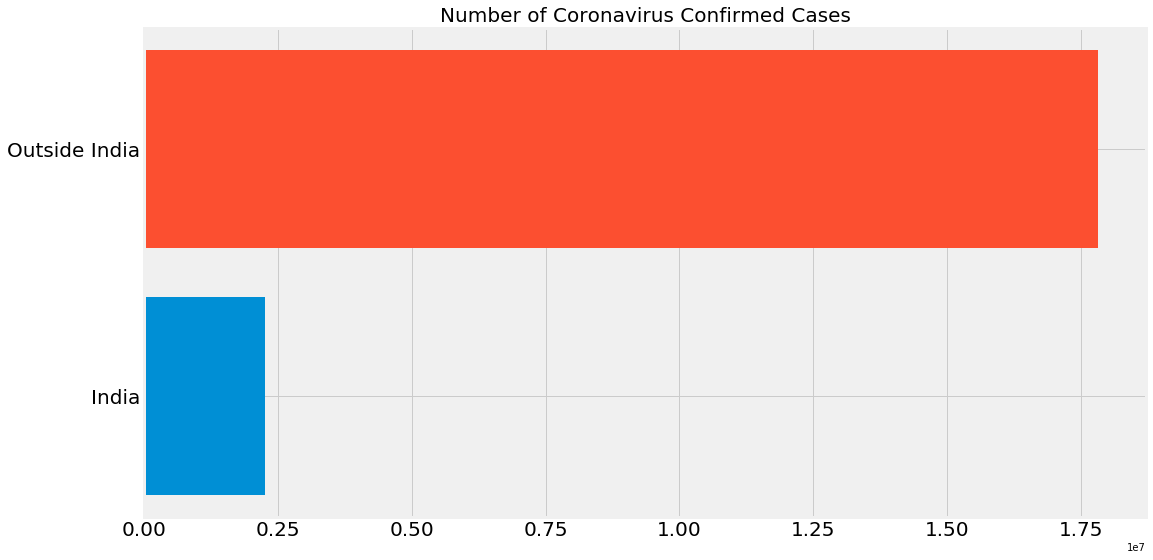

"USA_confirmed=latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()\noutside_USA_confirmed=np.sum(country_confirmed_cases)- USA_confirmed\nplt.figure(figsize=(16,9))\nplt.barh('USA',India_confirmed)\nplt.barh('Outside USA',outside_India_confirmed)\nplt.title('Number of Coronavirus Confirmed Cases',size=20)\nplt.xticks(size=20)\nplt.yticks(size=20)\nplt.show()"

In [41]:
#for India
India_confirmed=latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed=np.sum(country_confirmed_cases)- India_confirmed
plt.figure(figsize=(16,9))
plt.barh('India',India_confirmed)
plt.barh('Outside India',outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
"""USA_confirmed=latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed=np.sum(country_confirmed_cases)- USA_confirmed
plt.figure(figsize=(16,9))
plt.barh('USA',India_confirmed)
plt.barh('Outside USA',outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()"""

In [42]:
print('Outside_India {} cases:'.format(outside_India_confirmed))
print('India {} cases:'.format(India_confirmed))
print('Total {} cases:'.format(India_confirmed+outside_India_confirmed))

Outside_India 17820949 cases:
India 2268675 cases:
Total 20089624 cases:


In [43]:
days_since_1_22 =np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [44]:
days_in_future=30
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-30]

In [45]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [46]:
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates= []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [47]:
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)

In [48]:
#data ---transform----> polinomial_regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed =poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed =poly.fit_transform(X_test_confirmed)
poly_future_forecast =poly.fit_transform(future_forecast)

In [49]:
#polynimial_regression
linear_model=LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed,y_train_confirmed)
test_linear_pred=linear_model.predict(poly_X_test_confirmed)
linear_pred=linear_model.predict(poly_future_forecast)
print('MAE:',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred,y_test_confirmed))


MAE: 1694431.747958213
MSE: 4156255682762.0483


In [50]:

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#print(classification_report(y_test_confirmed,test_linear_pred))
#print(metrics.confusion_matrix(y_test_confirmed,test_linear_pred))

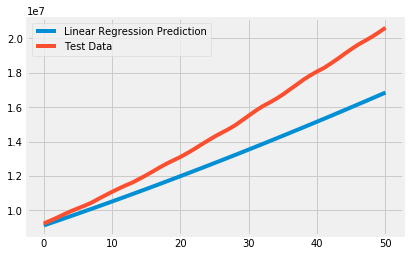

In [51]:

plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)
plt.legend(['Linear Regression Prediction','Test Data'])

In [52]:
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_confirmed = sc.fit_transform(X_train_confirmed)
X_test_confirmed = sc.transform(X_test_confirmed)"""

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train_confirmed = sc.fit_transform(X_train_confirmed)\nX_test_confirmed = sc.transform(X_test_confirmed)'

In [53]:
#SVM model
"""X_train = np.array(X_train).reshape(len(X_train_confirmed), -1)
y_train = np.array(y_train).reshape(len(y_train_confirmed), -1)
"""
"""kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)"""
svm_confirmed=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5,C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred=svm_confirmed.predict(future_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
svm_test_pred=svm_confirmed.predict(X_test_confirmed)

MAE: 13132175.452605238
MSE: 230210772885554.3


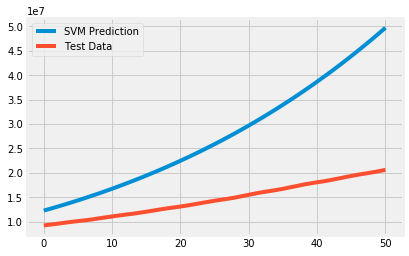

In [55]:
#check against test data
svm_test_predict=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_predict)
plt.plot(y_test_confirmed)
plt.legend(['SVM Prediction','Test Data'])
print('MAE:',mean_absolute_error(svm_test_predict,y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_predict,y_test_confirmed))

In [56]:
"""


print("Accuracy:- ", accuracy_score(y_test_confirmed,svm_test_predict))"""

'\n\n\nprint("Accuracy:- ", accuracy_score(y_test_confirmed,svm_test_predict))'

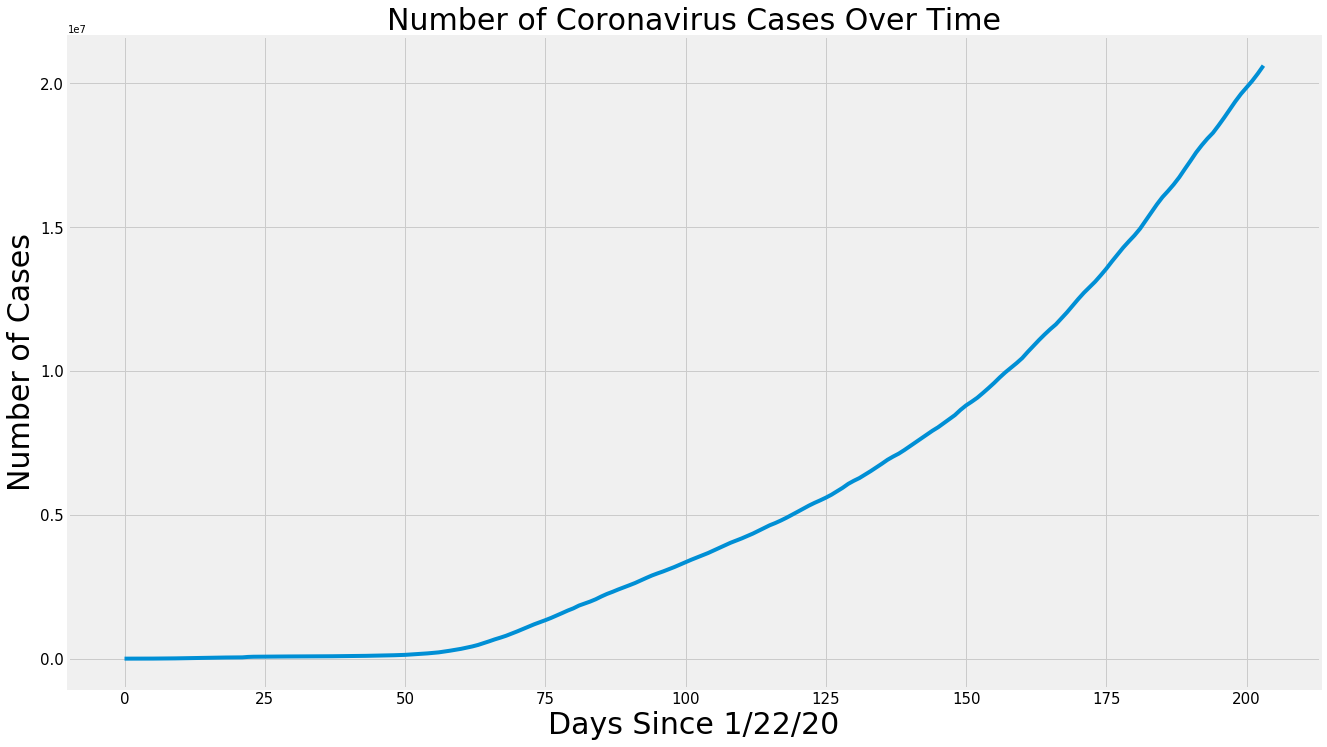

In [57]:
#cases over time (Total)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


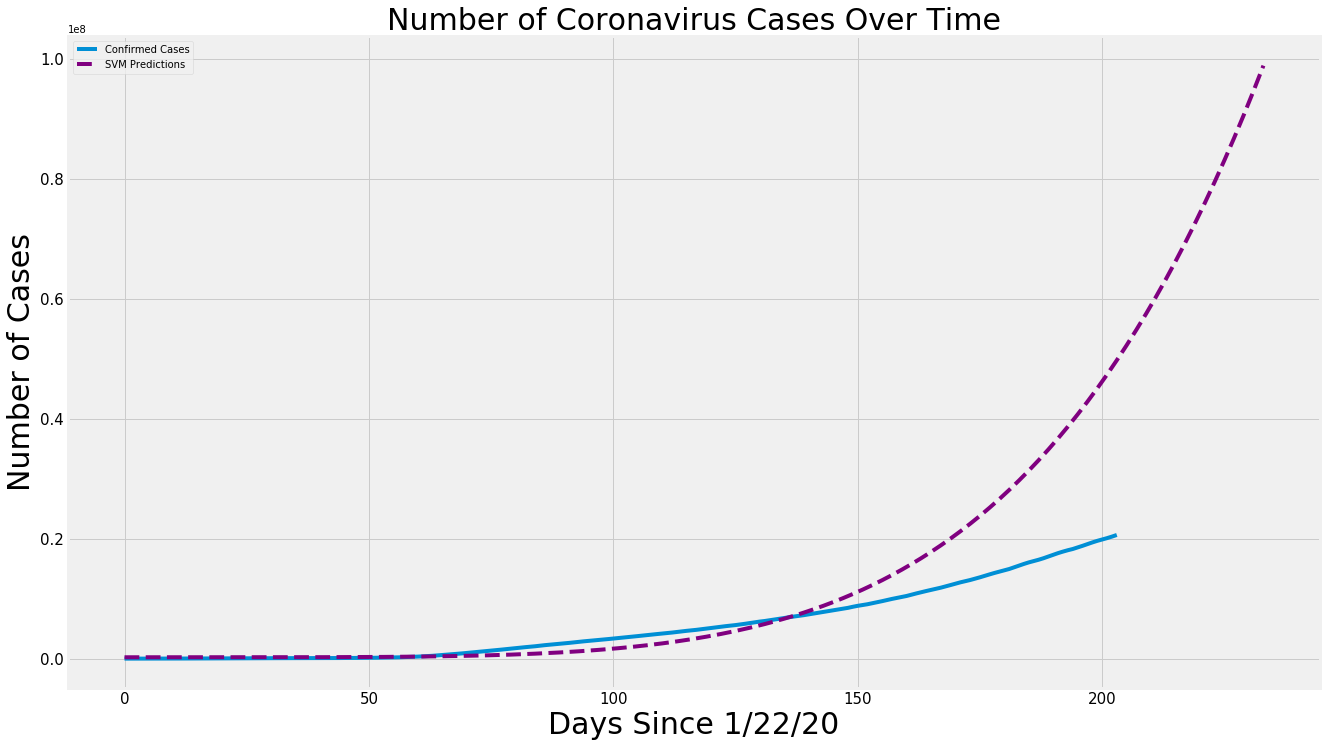

In [58]:
#confirmed Vs predicted
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='purple')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','SVM Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [59]:
#prediction for next 20 days
print("SVM Future Prediction: ")
set(zip(future_forecast_dates[-20:],svm_pred[-20:]))

SVM Future Prediction: 


{('08/23/2020', 64694549.14325289),
 ('08/24/2020', 66214856.14660982),
 ('08/25/2020', 67763712.58240084),
 ('08/26/2020', 69341518.66748385),
 ('08/27/2020', 70948678.33819918),
 ('08/28/2020', 72585599.2772861),
 ('08/29/2020', 74252692.92480807),
 ('08/30/2020', 75950374.48755221),
 ('08/31/2020', 77679062.97229342),
 ('09/01/2020', 79439181.18896823),
 ('09/02/2020', 81231155.78265719),
 ('09/03/2020', 83055417.23254733),
 ('09/04/2020', 84912399.87958102),
 ('09/05/2020', 86802541.95154147),
 ('09/06/2020', 88726285.56433444),
 ('09/07/2020', 90684076.74103121),
 ('09/08/2020', 92676365.44580416),
 ('09/09/2020', 94703605.58813815),
 ('09/10/2020', 96766255.02991061),
 ('09/11/2020', 98864775.63098483)}

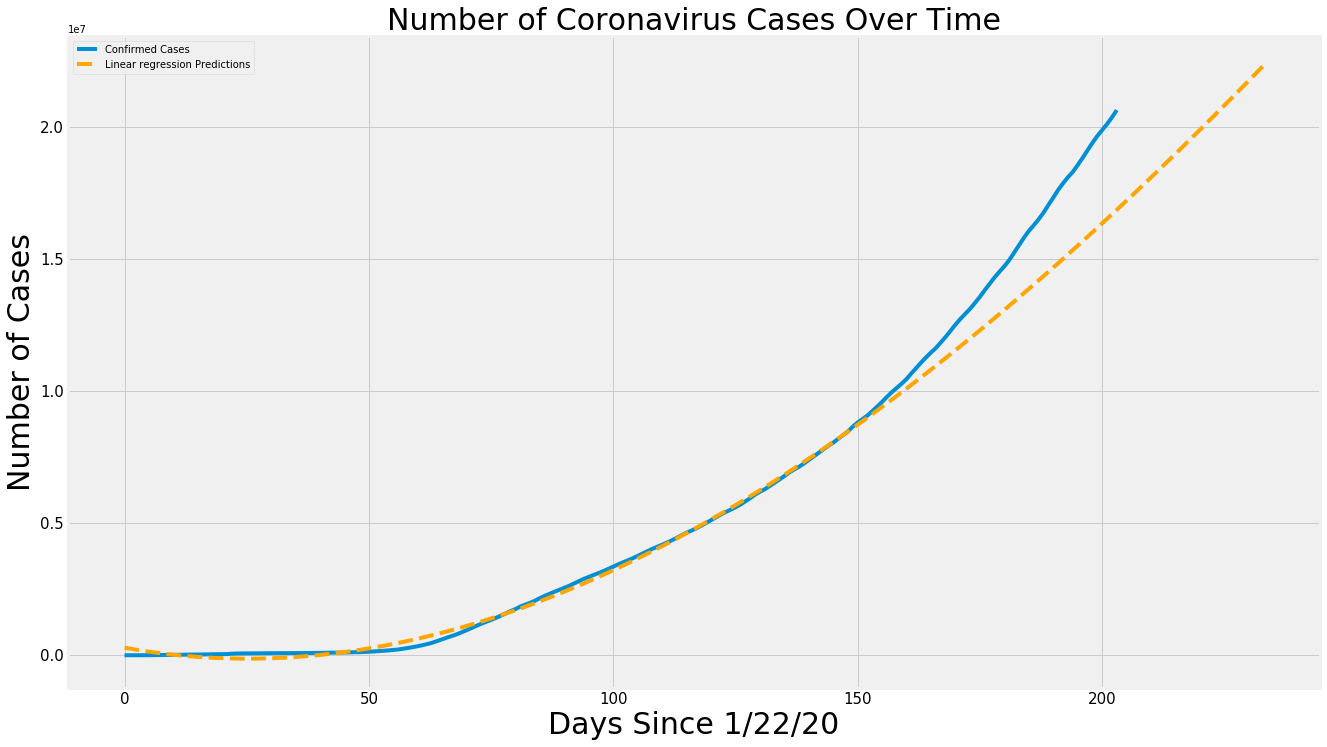

In [60]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Linear regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [61]:
print("Linear Regression Future Prediction")
print(linear_pred[-10:])

Linear Regression Future Prediction
[[20610890.35898099]
 [20796642.58815293]
 [20982975.50397746]
 [21169885.60359052]
 [21357369.38412808]
 [21545423.34272608]
 [21734043.97652049]
 [21923227.78264726]
 [22112971.25824234]
 [22303270.90044168]]


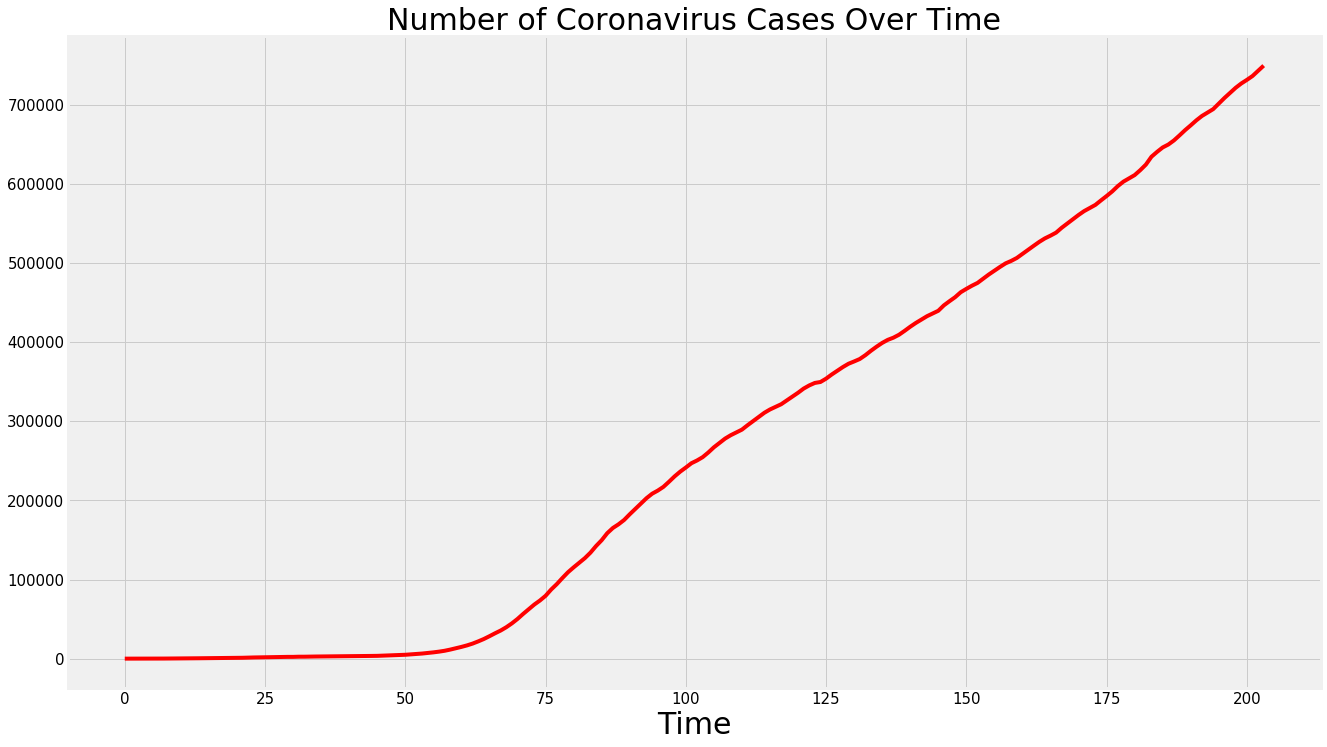

In [62]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths,color='red')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Time',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

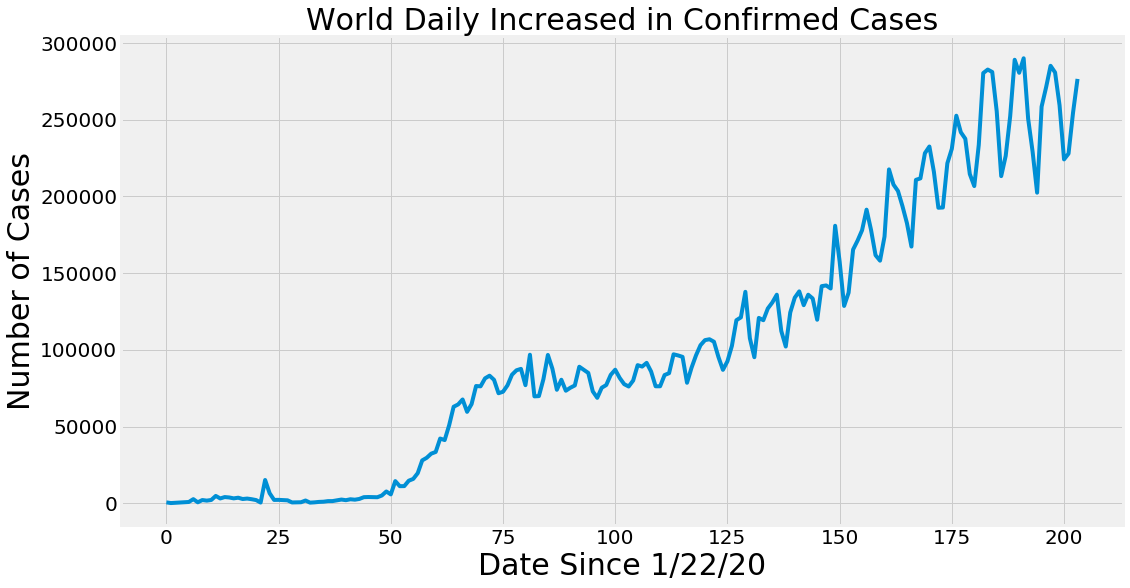

In [63]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,world_daily_increase)
plt.title('World Daily Increased in Confirmed Cases',size=30)
plt.xlabel('Date Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

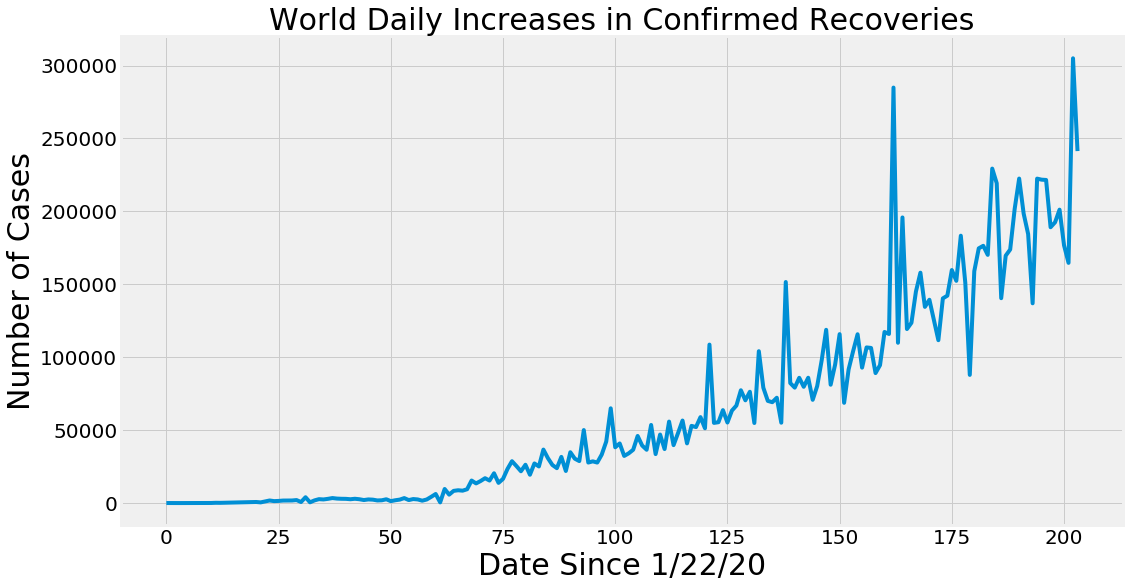

In [64]:
#world daily increase in confirmed recovery vs number of cases  with time
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries',size=30)
plt.xlabel('Date Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [65]:
#plot for predictions we acquired by Linear regression
def plot_predictions(x,y,pred,algo_name,color):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast,pred,linestyle='dashed',color=color)
    plt.title('Number of Coronavirus Cases with Time',size=30)
    plt.xlabel('Date Since 1/22/20',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.legend(['Confirmed Cases',algo_name],prop={'size':20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

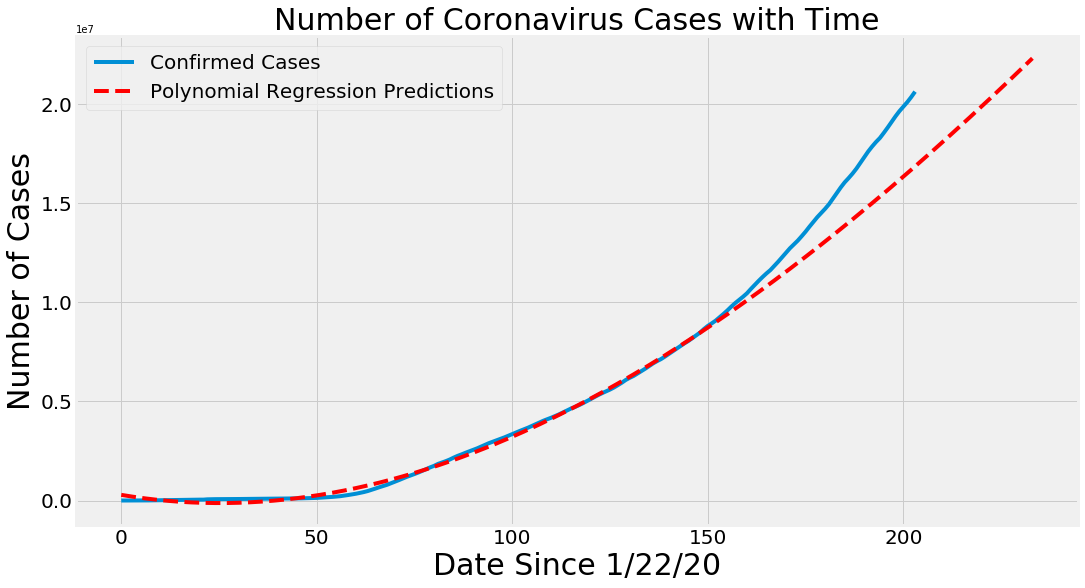

In [66]:
plot_predictions(adjusted_dates,world_cases,linear_pred,'Polynomial Regression Predictions','red')

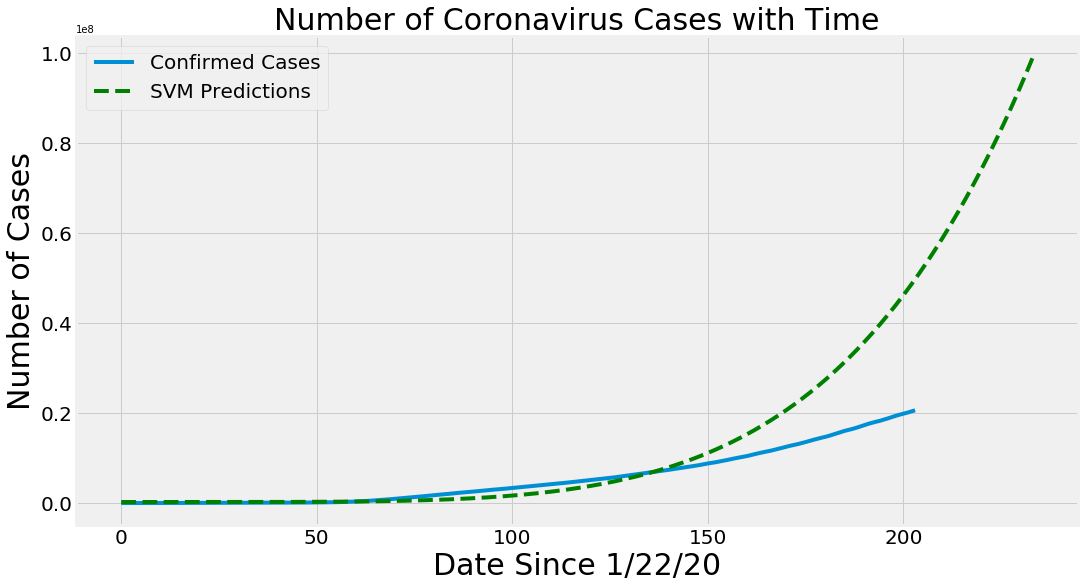

In [67]:
plot_predictions(adjusted_dates,world_cases,svm_pred,'SVM Predictions','green')

In [68]:
#future prediction using polly reg (all prediction using liner regression for next  30 days )
linear_pred=linear_pred.reshape(1,-1)[0]
poly_df=pd.DataFrame({'Date':future_forecast_dates[-30:],'Predicted number of Confirmed Cases worldwide':np.round(linear_pred)[-30:]})
poly_df

,Date,Predicted number of Confirmed Cases worldwide
0,08/13/2020,17023184.0
1,08/14/2020,17196587.0
2,08/15/2020,17370641.0
3,08/16/2020,17545342.0
4,08/17/2020,17720686.0
5,08/18/2020,17896671.0
6,08/19/2020,18073293.0
7,08/20/2020,18250548.0
8,08/21/2020,18428432.0
9,08/22/2020,18606943.0


In [69]:
#future prediction via SVM for next 30 days till 11th sept
svm_df=pd.DataFrame({'Date':future_forecast_dates[-30:],' SVM Predicted # of Confirmed Cases worldwide':np.round(svm_pred)[-30:]})
svm_df

,Date,SVM Predicted # of Confirmed Cases worldwide
0,08/13/2020,50976277.0
1,08/14/2020,52232295.0
2,08/15/2020,53513062.0
3,08/16/2020,54818940.0
4,08/17/2020,56150298.0
5,08/18/2020,57507506.0
6,08/19/2020,58890940.0
7,08/20/2020,60300978.0
8,08/21/2020,61738001.0
9,08/22/2020,63202395.0


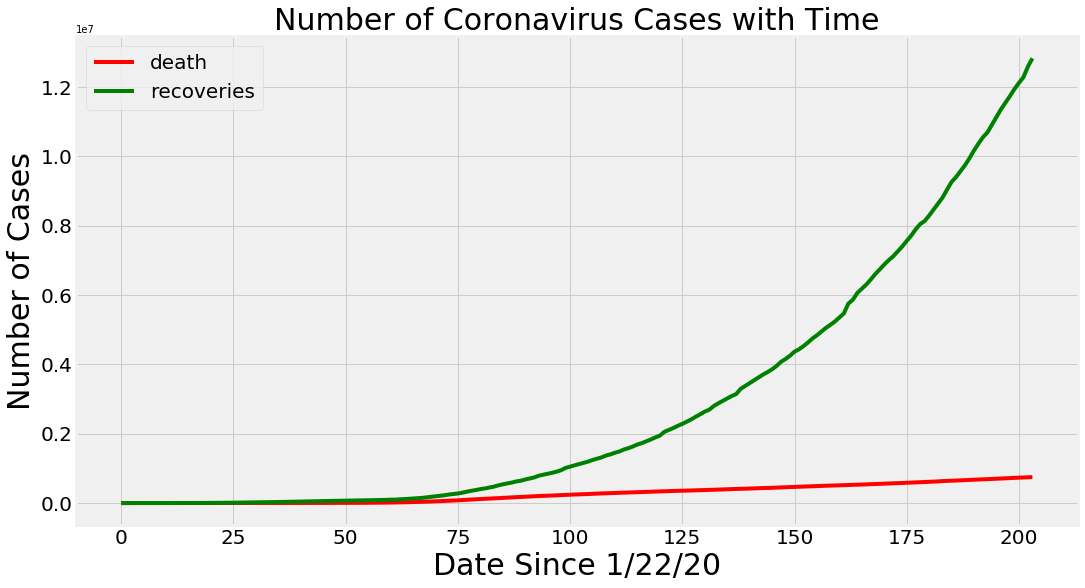

In [70]:
#Number of cases of Death and recoveries with respect to time
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_deaths,color='r')
plt.plot(adjusted_dates,total_recovered,color='green')
plt.legend(['death','recoveries'],loc='best',fontsize=20)
plt.title('Number of Coronavirus Cases with Time',size=30)
plt.xlabel('Date Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [71]:
#function for plotting future Death, recoveries and confirmed cases Country wise 
def country_plot(x,y1,y2,y3,y4,country):
    plt.figure(figsize=(16,9))
    plt.plot(x,y1)
    plt.title('{} Confirmed Cases'.format(country),size=30)
    plt.xlabel('Date Since 1/22/20',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.plot(x,y2)
    plt.title('{} Daily Increase in Confirmed Cases'.format(country),size=30)
    plt.xlabel('Date Since 1/22/20',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.plot(x,y3)
    plt.title('{} Daily Increase in Deaths'.format(country),size=30)
    plt.xlabel('Date Since 1/22/20',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.plot(x,y4)
    plt.title('{} Daily Increase in Recoveries'.format(country),size=30)
    plt.xlabel('Date Since 1/22/20',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
  

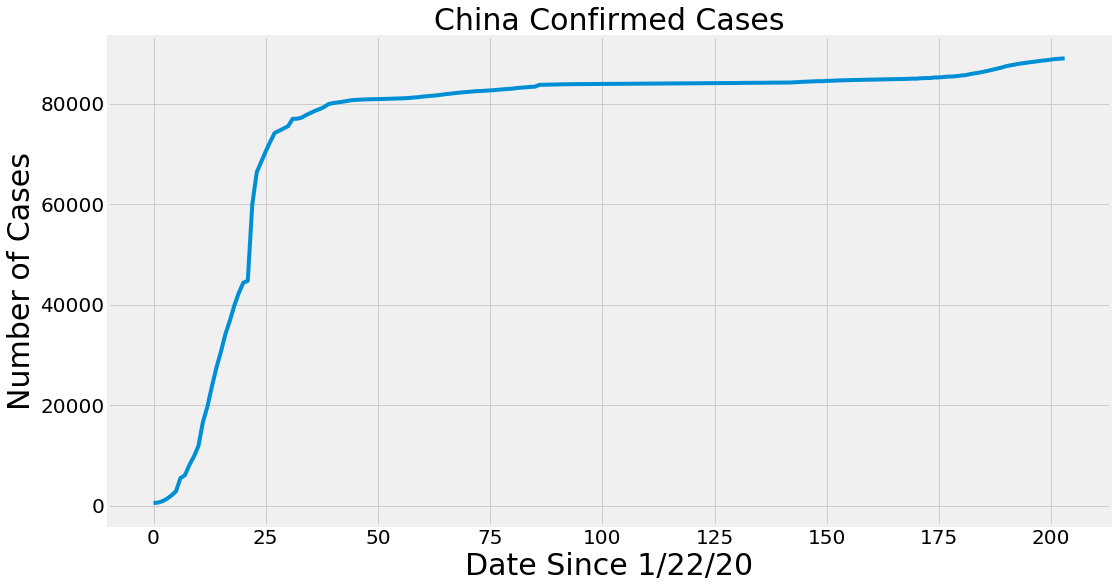

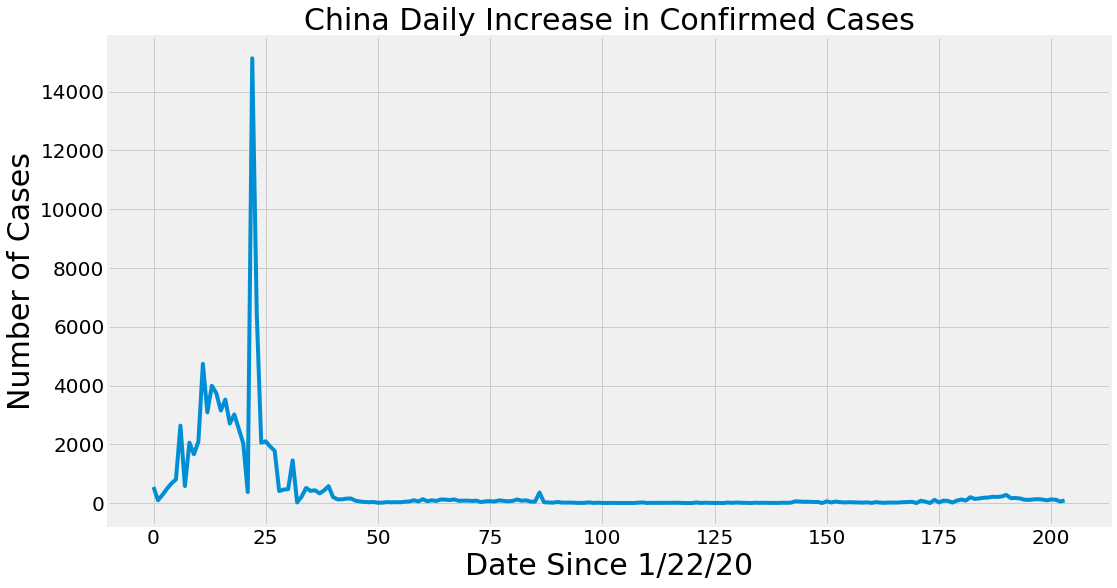

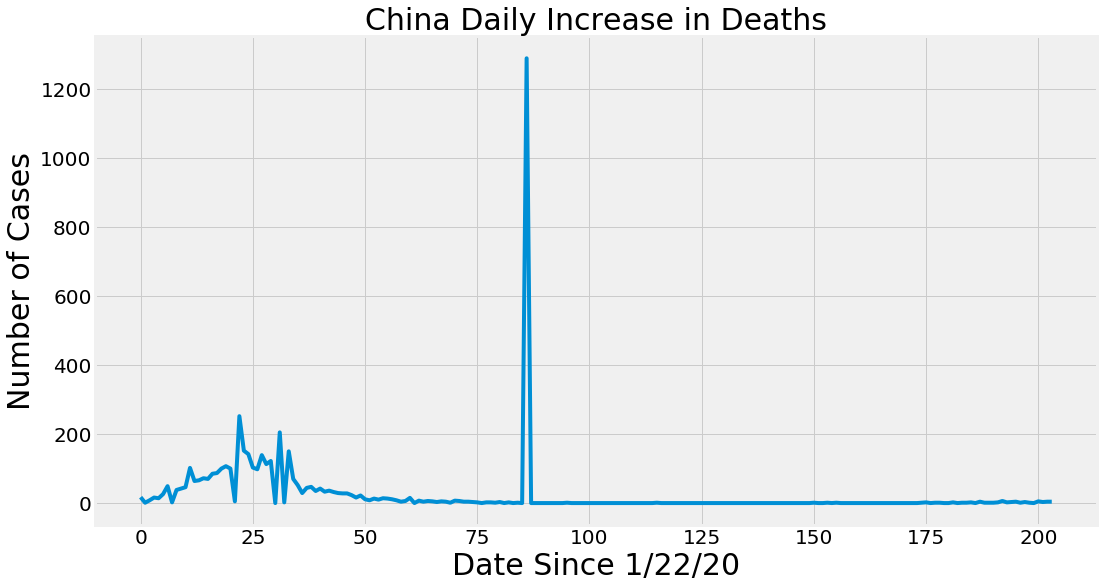

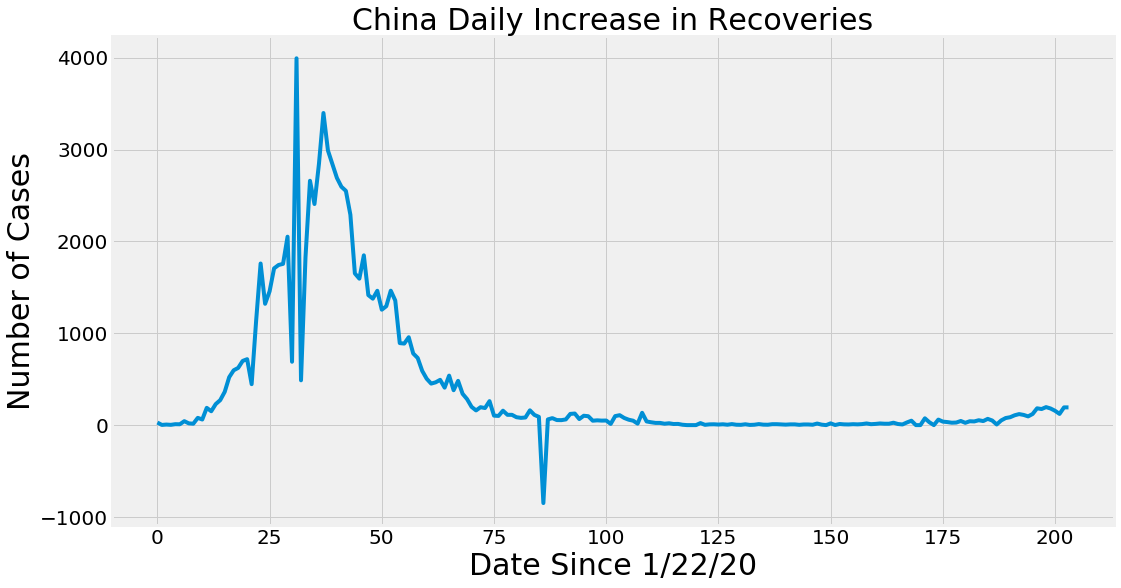

In [72]:
country_plot(adjusted_dates,china_cases,china_daily_increase,china_daily_death,china_daily_recovery,'China')

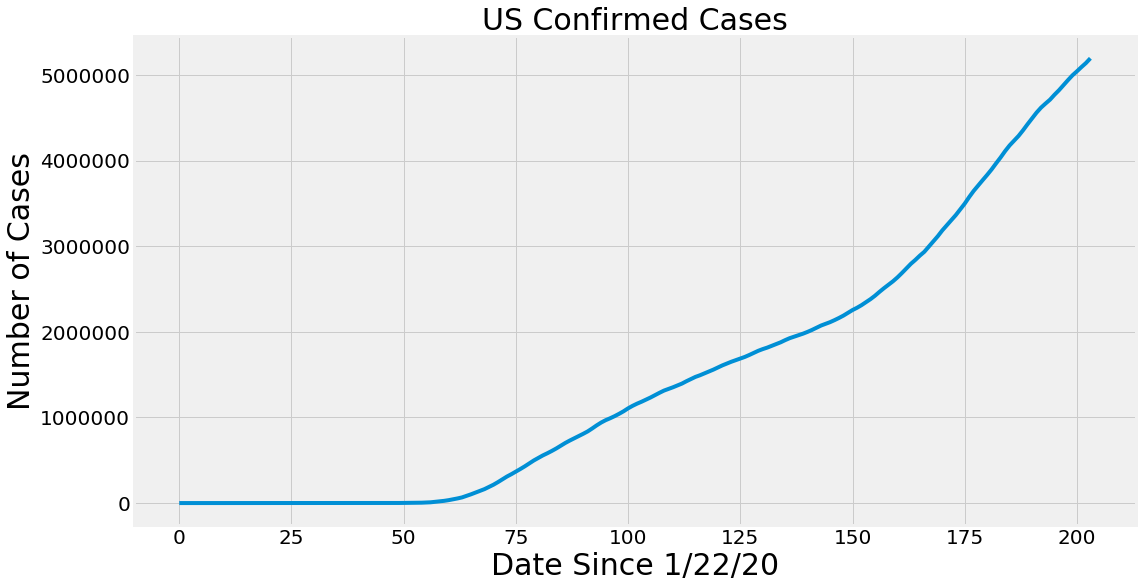

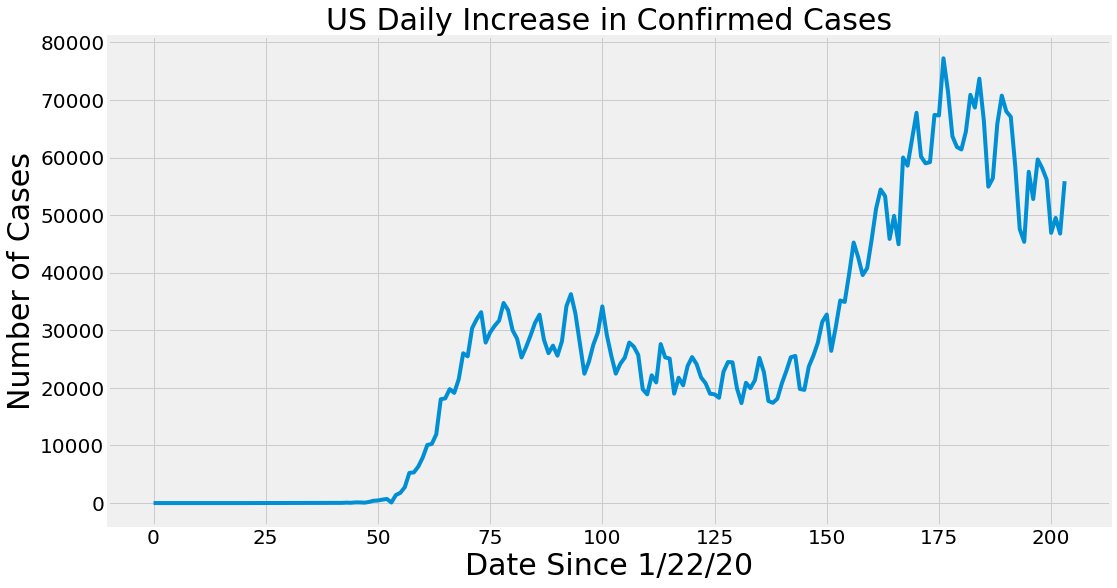

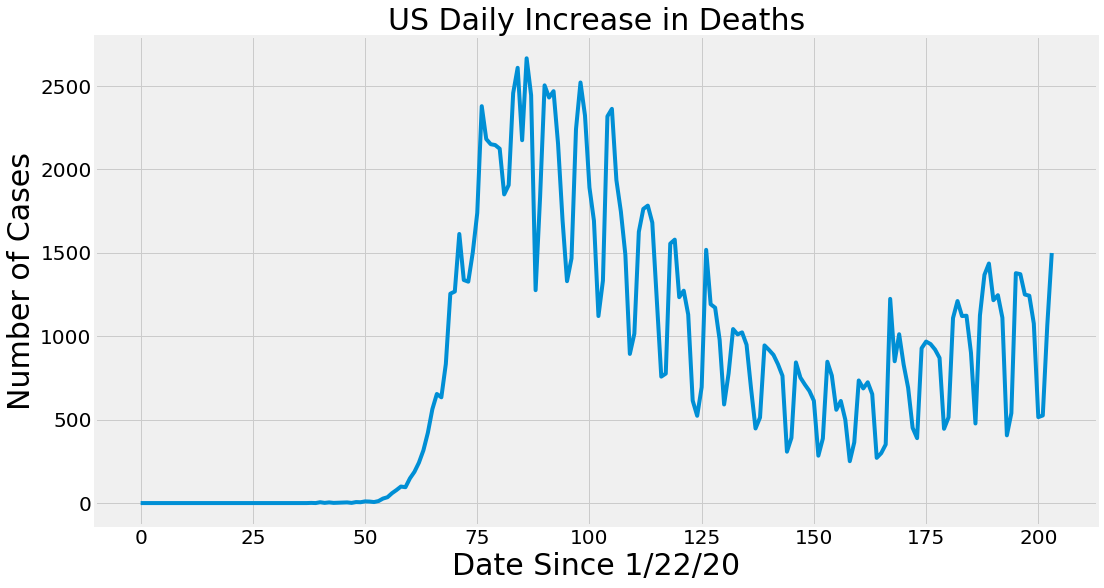

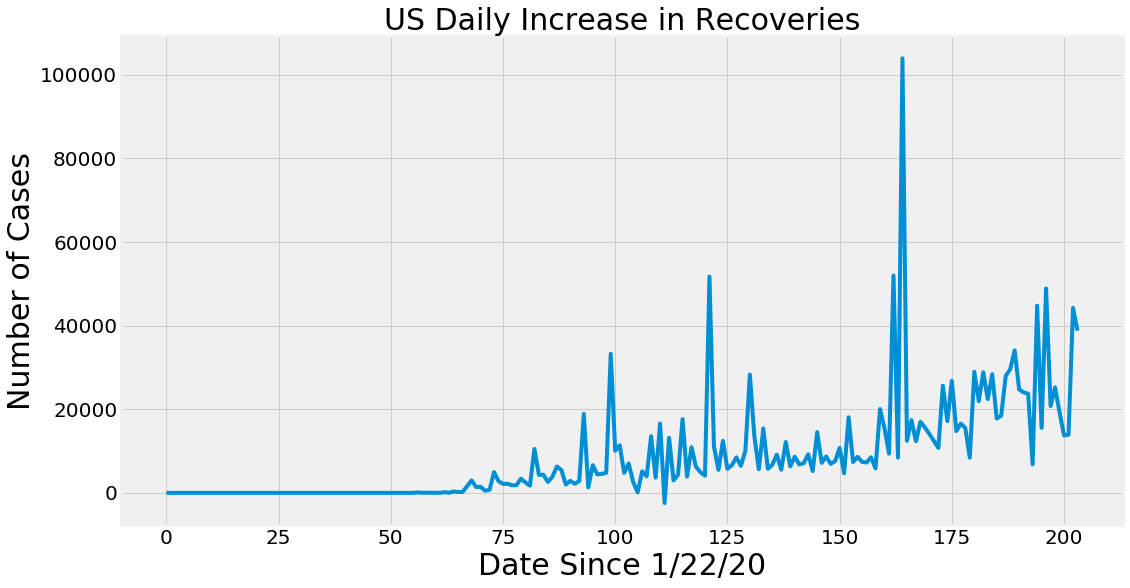

In [73]:
country_plot(adjusted_dates,us_cases,us_daily_increase,us_daily_death,us_daily_recovery,'US')

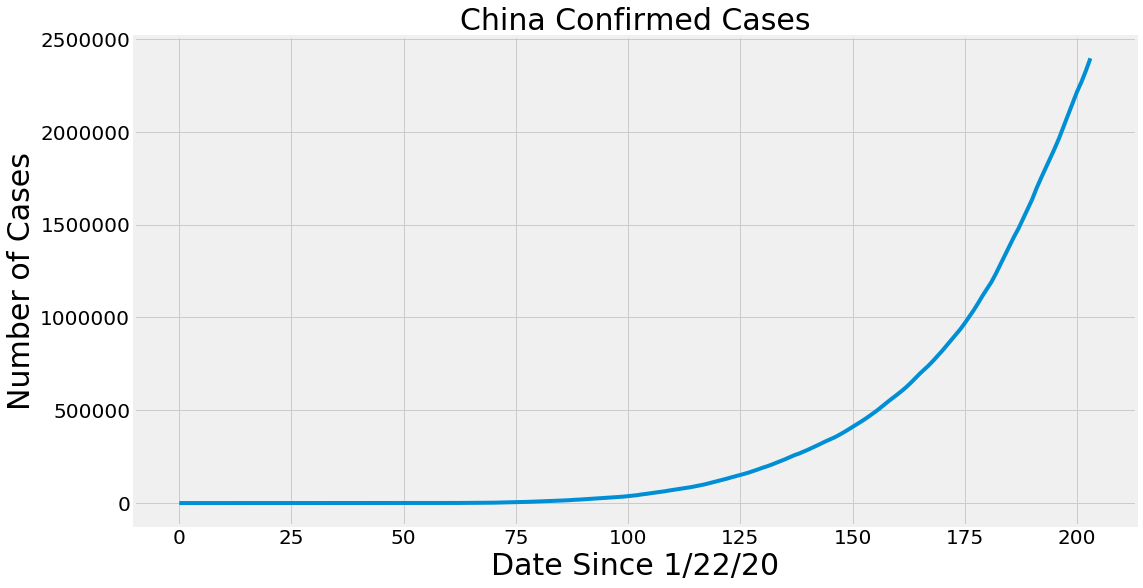

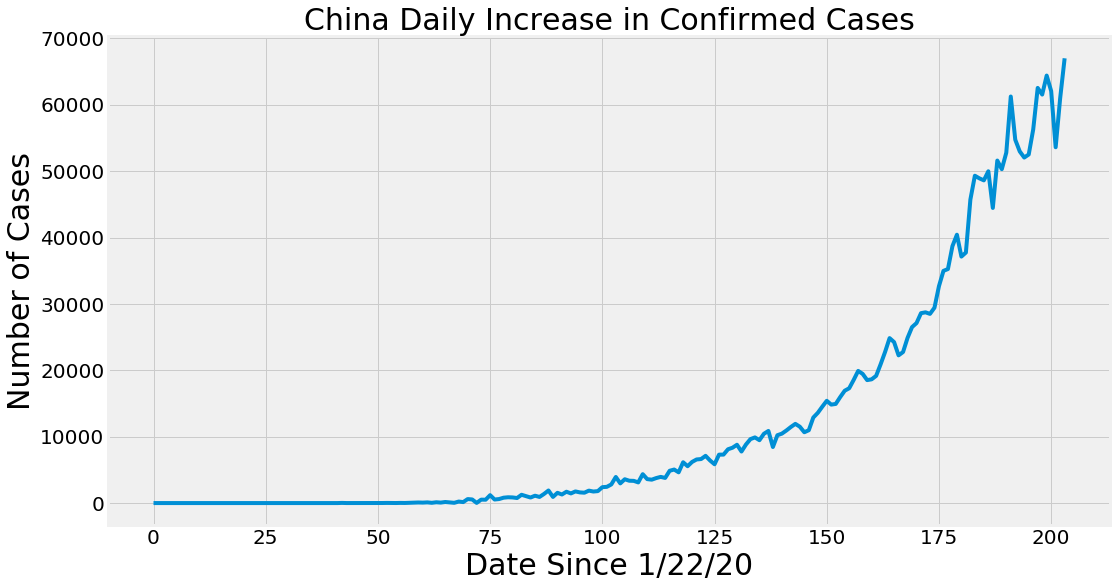

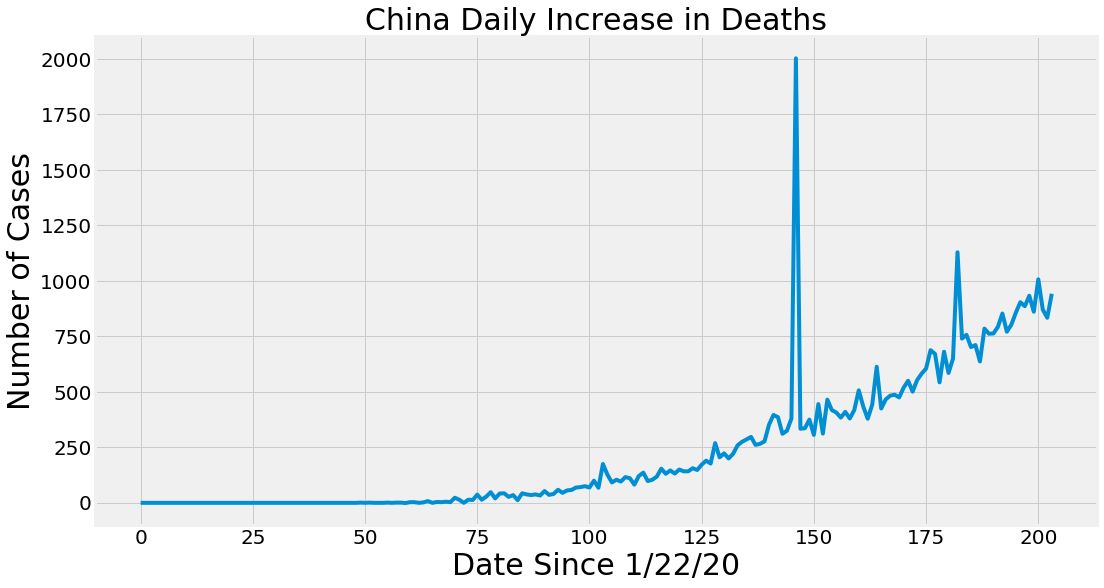

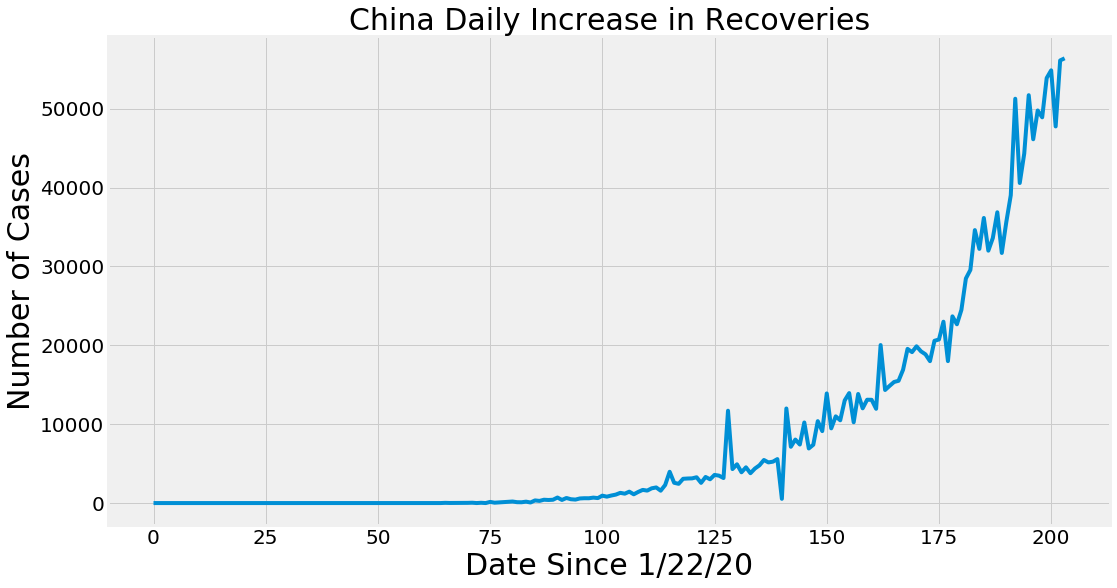

In [74]:
country_plot(adjusted_dates,india_cases,india_daily_increase,india_daily_death,india_daily_recovery,'China')

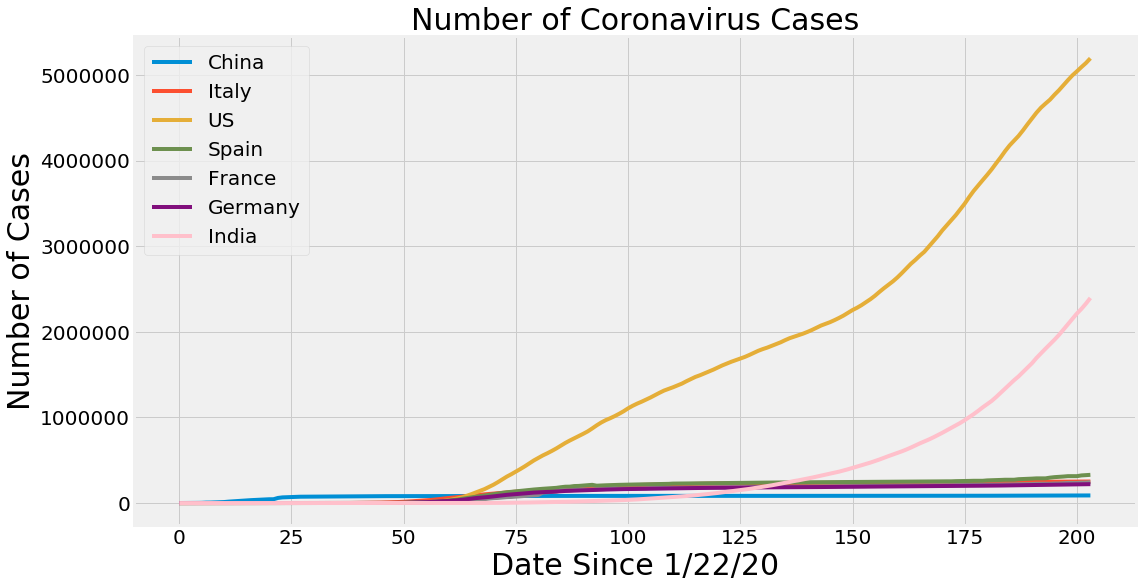

In [75]:
# a plot for confirmed cases for all countries
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,china_cases)
plt.plot(adjusted_dates,italy_cases)
plt.plot(adjusted_dates,us_cases)
plt.plot(adjusted_dates,spain_cases)
plt.plot(adjusted_dates,france_cases)
plt.plot(adjusted_dates,germany_cases)
plt.plot(adjusted_dates,india_cases,color='pink')
plt.title('Number of Coronavirus Cases',size=30)
plt.xlabel('Date Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['China','Italy','US','Spain','France','Germany','India'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

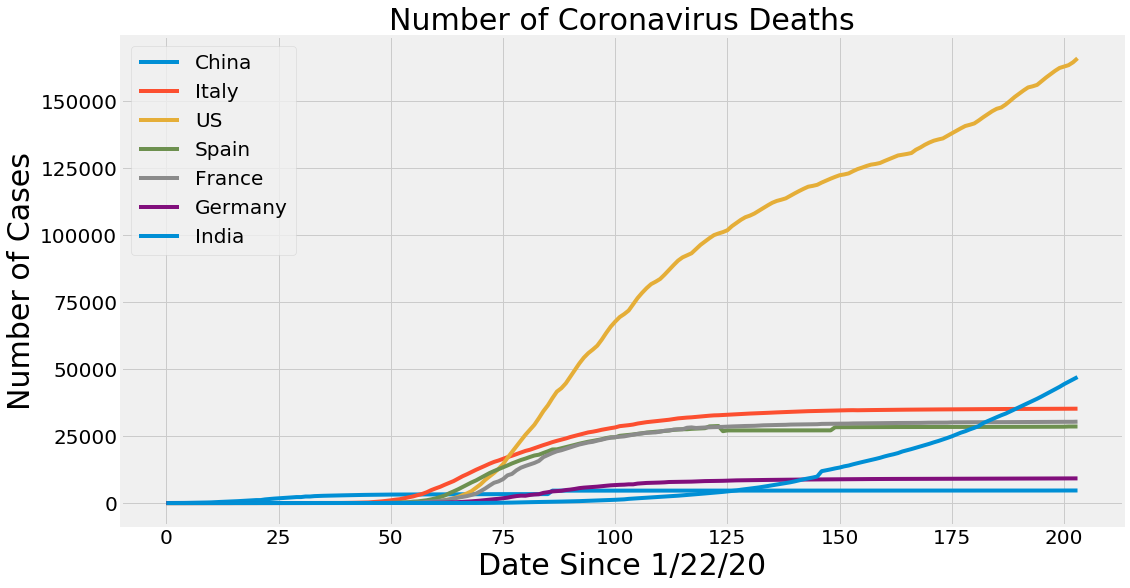

In [76]:
# a plot for Death cases for all countries
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,china_deaths)
plt.plot(adjusted_dates,italy_deaths)
plt.plot(adjusted_dates,us_deaths)
plt.plot(adjusted_dates,spain_deaths)
plt.plot(adjusted_dates,france_deaths)
plt.plot(adjusted_dates,germany_deaths)
plt.plot(adjusted_dates,india_deaths)
plt.title('Number of Coronavirus Deaths',size=30)
plt.xlabel('Date Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['China','Italy','US','Spain','France','Germany','India'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

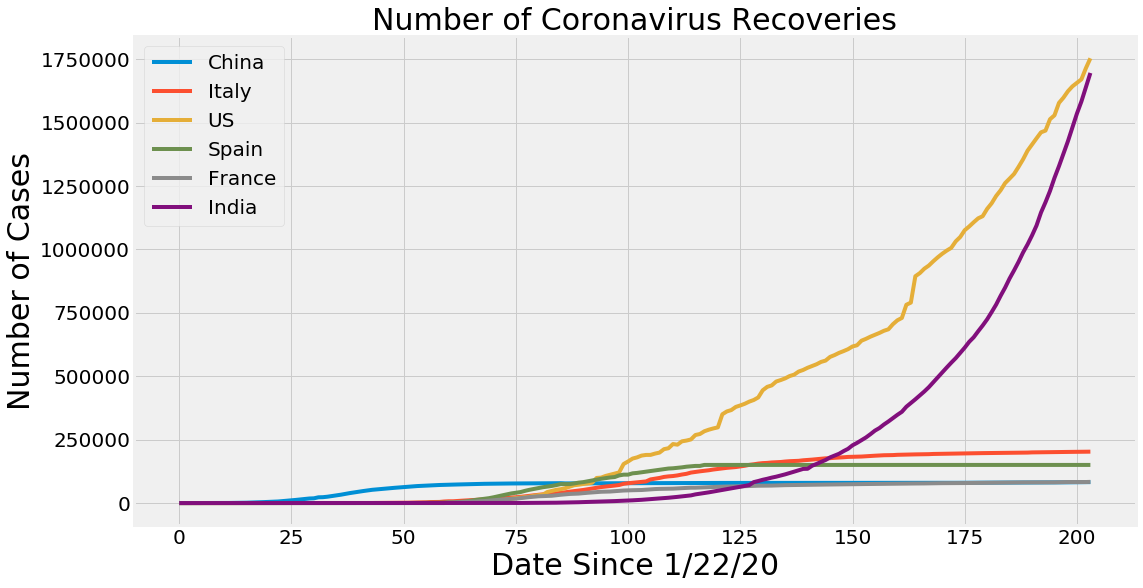

In [77]:
# a plot for recovered cases for all countries
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,china_recoveries)
plt.plot(adjusted_dates,italy_recoveries)
plt.plot(adjusted_dates,us_recoveries)
plt.plot(adjusted_dates,spain_recoveries)
plt.plot(adjusted_dates,france_recoveries)
#plt.plot(adjusted_dates,germany_recoveries)
plt.plot(adjusted_dates,india_recoveries)
plt.title('Number of Coronavirus Recoveries',size=30)
plt.xlabel('Date Since 1/22/20',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['China','Italy','US','Spain','France','India'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [78]:
italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039,
 112541,
 115288,
 120205,
 122810,
 125176,
 127326,
 129401,
 132282,
 134560,
 136720,
 138840,
 140479,
 141981,
 144658,
 147101,
 150604,
 152844,
 155633,
 157507,
 158355,
 160092,
 160938,
 161895,
 163781,
 165078,
 165837,
 166584,
 168646,
 169939,
 171338,
 173085,
 174865,
 

In [82]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train_confirmed, y_train_confirmed)

nb_pred=model.predict(future_forecast)
nb_test_predict=model.predict(X_test_confirmed)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 5457296.509803922
MSE: 41394322471310.9


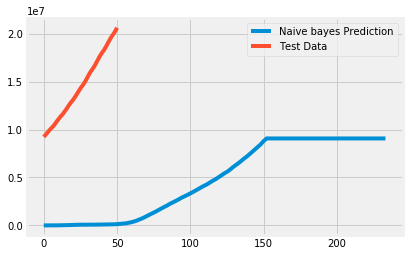

In [88]:
nb_test_predict=model.predict(X_test_confirmed)
plt.plot(nb_pred)
plt.plot(y_test_confirmed)
plt.legend(['Naive bayes Prediction','Test Data'])
print('MAE:',mean_absolute_error(nb_test_predict,y_test_confirmed))
print('MSE:',mean_squared_error(nb_test_predict,y_test_confirmed))

In [89]:
nb_test_predict

array([9072474, 9072474, 9072474, 9072474, 9072474, 9072474, 9072474,
       9072474, 9072474, 9072474, 9072474, 9072474, 9072474, 9072474,
       9072474, 9072474, 9072474, 9072474, 9072474, 9072474, 9072474,
       9072474, 9072474, 9072474, 9072474, 9072474, 9072474, 9072474,
       9072474, 9072474, 9072474, 9072474, 9072474, 9072474, 9072474,
       9072474, 9072474, 9072474, 9072474, 9072474, 9072474, 9072474,
       9072474, 9072474, 9072474, 9072474, 9072474, 9072474, 9072474,
       9072474, 9072474], dtype=int64)